In [2]:
# Import packages which are using in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline


# Garther Data

### 1. From twitter-archieve-enhance source

> The data source is given by Udacity under csv file. 

In [2]:
# read data file
tw_df = pd.read_csv('twitter-archive-enhanced.csv')
tw_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# explore data 
tw_df.shape

(2356, 17)

In [4]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 2. From Tweet Image Prediction source

> The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
# download image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open('image_prediction.tsv','wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image_prediction.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. From Twitter API source

> Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time
import datetime
import random

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [11]:
tweet_ids = tw_df.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

##### Save JSON data to file

In [12]:
tweet_json_data = 'tweet_json.txt'

In [13]:
with open (tweet_json_data,'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json,outfile)
        outfile.write('\n')

In [14]:
tweet_file =[]

tweet_json_df = open('tweet_json.txt','r')

for line in tweet_json_df:
    tweet = json.loads(line)
    tweet_file.append(tweet)
    
tweet_json_df.close()

In [40]:
tweet_file[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

##### Export JSON data to new dataframe with 3 columns and under csv file

In [37]:
# There are a lot of information in tweet file, then I want to create new dataframe which includes only 3 certain features such as 'id', 'retweet_count', and 'favorite_count'
tweet_ana = pd.DataFrame()
tweet_ana['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_file))
tweet_ana['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_file))
tweet_ana['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_file))

In [38]:
tweet_ana.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36285,7723
1,892177421306343426,31289,5714
2,891815181378084864,23558,3786
3,891689557279858688,39579,7882
4,891327558926688256,37802,8500


In [39]:
tweet_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [40]:
tweet_ana.to_csv('tweet_analysis.csv', index=False)

# Access Data

### General information
> There are 3 dataframes.
>    - Archieved dataframe which has information dog types, dog's characteristics and the tweet rating. 
>    - Prediction dataframe whhich has images to identify dog breed.
>    - Tweet dataframe which has retweet count and favorite count.

In [7]:
# Gather all data once her
archieved = pd.read_csv('twitter-archive-enhanced.csv')
prediction = pd.read_csv('image_prediction.tsv', sep='\t')
tweet = pd.read_csv('tweet_analysis.csv')

In [8]:
archieved.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
archieved.tail()
# The name columns has some weird dog's names. Let see in details

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
archieved['name'].value_counts()
# There are a and an are weird names of dog. They are may be errors

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Daisy          7
Bailey         7
an             7
Buddy          7
Dave           6
Koda           6
Rusty          6
Leo            6
Stanley        6
Jack           6
Scout          6
Milo           6
Bella          6
Oscar          6
Jax            6
Larry          5
            ... 
Izzy           1
Bobby          1
Rizzo          1
Derby          1
Anthony        1
Halo           1
Rooney         1
DonDon         1
Wiggles        1
Glacier        1
Erik           1
Grizzie        1
Ginger         1
Crawford       1
Doobert        1
Lucia          1
Bookstore      1
Georgie        1
Einstein       1
Ed             1
Hanz           1
Rudy           1
Sora           1
Meera          1
Stormy         1
Jebberson      1
Sweet          1
Jerome        

In [11]:
archieved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
sum(archieved.duplicated())

0

In [13]:
archieved['rating_denominator'].value_counts()
# Denomiator rating's maximum is 10. The others rating over 10 may be errors

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
archieved['rating_numerator'].value_counts()
# There are some ratings over 100 such as 420, 960 or 1776 are weird. They may be errors

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
archieved['source'].value_counts()
# Mostly people used iphone for posting tweets

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [18]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(prediction.duplicated())

0

In [20]:
tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36285,7723
1,892177421306343426,31289,5714
2,891815181378084864,23558,3786
3,891689557279858688,39579,7882
4,891327558926688256,37802,8500


In [21]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [22]:
sum(tweet.duplicated())

0

> - By accessing data after gathering, I can identify quality and tidiness issues. 
> - To be successful in accessing quality data, I based on 4 dimensions of data quality accessment: Completeness, Validity, Accuracy, and Consistency. 

### Comments for quality and tidiness issues based on 3 dataframes
##### Quality Issues:
> 1. Retweets and replies columns have a lot of missing values, and are not needed in this project. Then, they should be deleted
> 2. Expand URL has 281 entries without URLs, these entries also should not take into account
> 3. Timestamp columns should not be in object(str) type. 
> 4. Ratings denominators is over than 10. They may be from wrong typing
> 5. Numerators have some incorrect values. 
> 6. Some dog's names are incorrect.
> 7. Dog'names should be in same format with first letter capital. 
> 8. P1, P2, and P3 in prediction dataframe need to be fixed in same format

##### Tidiness Issues:
> 1. 3 dataframs can be merged together
> 2. Dog's stages are split into 4 columnns. They should be merge in 1 column

# Clean Data

In [23]:
# Creat 3 copy dataframes to compare later
archieved_clean = archieved.copy()
prediction_clean = prediction.copy()
tweet_clean = tweet.copy()

### 1. Tidiness Issues - part 1

#### Define:
> Merge 3 data sources into 1 dataframe

#### Code:
> Using pd.merge() function to merge 3 data sources by tweet_id

In [24]:
# Merged 3 dataframes into 1 dataframe
Twitter_archieve_master = pd.merge(archieved_clean, tweet_clean, on=['tweet_id','tweet_id'], how='left')

In [25]:
Twitter_archieve_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36285.0,7723.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31289.0,5714.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23558.0,3786.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39579.0,7882.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37802.0,8500.0


In [26]:
Twitter_archieve_master = pd.merge(Twitter_archieve_master, prediction_clean, on='tweet_id',how='left')

In [27]:
# Set display columns up to 35 columns
pd.set_option("display.max_columns",35)

#### Test:
> Check all columns are available and the non-null values

In [28]:
Twitter_archieve_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36285.0,7723.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31289.0,5714.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23558.0,3786.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39579.0,7882.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37802.0,8500.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [29]:
Twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

In [30]:
# Export master merged file to CSV file
Twitter_archieve_master.to_csv('twitter_archieve_master.csv', encoding = 'utf-8', index=False)

In [31]:
# Call and read again merged file into shorted dataframe name "df"
df = pd.read_csv('twitter_archieve_master.csv')

In [32]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36285.0,7723.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31289.0,5714.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 2. Tidiness Issues - part 2

#### Define:
> - Check the value and unique in each column of 4 dog stages
> - Merge 4 columns of dog's stage into 1 column

#### Code:
> - Using value_counts() for checking values available in each column
> - Using pf.melt() to combine 4 columns of dog stages under 1 column name "dog_type"

In [33]:
# merge 4 columns of dog's stages into 1 column
# finding the values inside 4 columns
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [34]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [35]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [36]:
df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [37]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [38]:
# I create column dog's type
df_m = pd.melt(df,id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], value_name='dog_type')
df_m = df_m.drop('variable',axis=1)

#### Test:

In [39]:
df_m.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,36285.0,7723.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31289.0,5714.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None


In [40]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 27 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
favorite_count                9324 non-null float64
retweet_count                 9324 non-null float64
jpg_url                       8300 non-null object
img_num                       8300 non-null float64
p1                         

In [41]:
df_m['dog_type'].value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [42]:
df_m = df_m.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [43]:
df_m['dog_type'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

### 1. Quality Issues - Part 1: Expanded URLs

#### Define:
> Check null values in column expanded_urls and drop null values by rows

#### Code:
> - Using .isnull to check total null values in the column
> - Using dropna() to drops these null values

In [44]:
# Check how many null entries for expanded urls
df_m['expanded_urls'].isnull().sum()

59

In [45]:
# drop these 59 entries
df_m = df_m.dropna(subset=['expanded_urls'])

#### Test:

In [46]:
# Check again
df_m['expanded_urls'].isnull().sum()

0

### 2. Quality Issues - Part 2: Change Source Names

#### Define:
> - Shorten name of values in column source

#### Code:
> Using replace function to change name

In [47]:
# Change sources to category names for visuallization easier
df_m['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2163
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [48]:
df_m['source'] = df_m['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for Iphone')
df_m['source'] = df_m['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_m['source'] = df_m['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_m['source'] = df_m['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweet Deck')

#### Test:

In [49]:
df_m['source'].value_counts()

Twitter for Iphone     2163
Vine - Make a Scene      91
Twitter Web Client       32
Tweet Deck               11
Name: source, dtype: int64

### 3. Quality Issues -  Part 3: Change type of column Timestamp

#### Define:
> Change type data of column timestamp

#### Code:
> Using pd.to_datetime() function to change type of column from string to datetime64 type

In [50]:
# Change type of timestamp
df_m['timestamp'] = pd.to_datetime(df_m['timestamp'])

#### Test:

In [51]:
df_m['timestamp'].head(3)

2259   2015-11-20 03:51:52
2260   2015-11-20 03:51:47
2261   2015-11-20 03:44:31
Name: timestamp, dtype: datetime64[ns]

### 4. Quality Issues - Part 4: Drop columns of retweets and replies in orginial Archieved Dataframe

#### Define:
> - Drop columns which are relevant to retweets and replies in dataframe

#### Code:
> - Creat a list which includes all columns need to be drop
> - Using drop() function to drop this list 

In [52]:
# drop retweets and replies columns
drop_columns = ['retweeted_status_id', 'retweeted_status_user_id', 
                'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id']
df_m = df_m.drop(drop_columns, axis=1)

#### Test:

In [53]:
# Check again
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 2259 to 7236
Data columns (total 22 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
favorite_count        2272 non-null float64
retweet_count         2272 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog             

### 5. Quality Issues - Part 5: Check incorrect values of Rating_Denominator and Rating_Numerator

#### Define:
> - Checking incorrect values in rating_denominator, must be all under 10
> - Checking in text column any information is written for correct denominator and numerator

#### Code:
> - Using value_counts() to check the values inside columns
> - Create 1 dataframe which includes tweet_id, text, rating_numerator and rating_denominator
> - Check text then using replace() to change to score of both ratings

In [54]:
# Correct the incorrect values of denominator and numerator by 
# filter the IDs have denomitor over 10 and reading text if anything need to be noticed
df_m['rating_denominator'].value_counts()

10     2278
11        3
50        3
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [55]:
df_den = df_m[df_m['rating_denominator'] != 10]
df_den[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,2
3789,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,44,40
3707,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50
3990,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,130
3991,684222868335505415,Someone help the girl is being mugged. Several...,121,110
3521,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
3558,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
3424,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
3476,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
3584,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90


In [56]:
# There are 8 IDs need to be changed in denominator and numerator

In [57]:
df_m.loc[df_m.tweet_id == 666287406224695296,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 682962037429899265,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 684222868335505415,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 716439118184652801,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 722974582966214656,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 740373189193256964,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 775096608509886464,['rating_denominator']] = 10
df_m.loc[df_m.tweet_id == 835246439529840000,['rating_denominator']] = 10

#### Test:
> 1. For denominator

In [58]:
df_m.loc[df_m.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2335,666287406224695296,2015-11-16 16:11:11,Twitter for Iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,10,an,138.0,62.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None


In [59]:
df_m.loc[df_m.tweet_id == 666287406224695296,['rating_numerator']] = 9
df_m.loc[df_m.tweet_id == 682962037429899265,['rating_numerator']] = 10
df_m.loc[df_m.tweet_id == 684222868335505415,['rating_numerator']] = 12
df_m.loc[df_m.tweet_id == 716439118184652801,['rating_numerator']] = 11
df_m.loc[df_m.tweet_id == 722974582966214656,['rating_numerator']] = 10
df_m.loc[df_m.tweet_id == 740373189193256964,['rating_numerator']] = 14
df_m.loc[df_m.tweet_id == 775096608509886464,['rating_numerator']] = 14
df_m.loc[df_m.tweet_id == 835246439529840000,['rating_numerator']] = 13

> 2. For numerator

In [60]:
df_m.loc[df_m.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2335,666287406224695296,2015-11-16 16:11:11,Twitter for Iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,138.0,62.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None


### 6. Quality Issues - Part 6: Check Dog Names values and change format

#### Define:
> - Check name of dogs and combine these weird name by wrong typing into group None
> - Check the format with all name with 1st letter is capitalized

#### Code:
> - Using unique() to check all name
> - Group all wrong names in a list and create a loop to replace all these wrong names to None

In [63]:
# Check name columns, convert all weird and unclear names into "Unknown"
print('Names of dogs: {}'.format(df_m['name'].unique()))

Names of dogs: ['None' 'George' 'Kial' 'Frank' 'Dook' 'Hall' 'Philippe' 'Naphaniel'
 'Olive' 'Otis' 'Cleopatricia' 'Erik' 'Stu' 'Tedrick' 'Calvin' 'Filup'
 'Shaggy' 'Reese' 'Cupcake' 'Clybe' 'Dave' 'Keet' 'Gabe' 'Klevin' 'Jeph'
 'Jockson' 'Carll' 'Pipsy' 'Bradlay' 'Biden' 'Fwed' 'Genevieve' 'Joshwa'
 'Timison' 'Clarence' 'Kenneth' 'Churlie' 'Jiminy' 'Alfie' 'Rusty' 'Sophie'
 'Jareld' 'Bisquick' 'Ron' 'Skittles' 'Torque' 'DayZ' 'Jo' 'Kallie'
 'Marvin' 'Spark' 'Gòrdón' 'Josep' 'Lugan' 'Christoper' 'Jimothy'
 'Kreggory' 'Scout' 'Walter' 'Phineas' 'Monkey' 'Aja' 'Penny' 'Dante'
 'Nelly' 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Emmy' 'Shadow'
 'Jeffrey' 'Canela' 'Maya' 'Gerald' 'Mingus' 'Waffles' 'Jimbo' 'Maisey'
 'Derek' 'Ralphus' 'Zeke' 'Tilly' 'Archie' 'Darla' 'Franklin' 'Jax' 'Zoey'
 'Koda' 'Bruno' 'Ted' 'Oliver' 'Jim' 'Terrance' 'Lilly' 'Earl' 'Bella'
 'Jesse' 'Romeo' 'Louis' 'Bailey' 'Jack' 'Steven' 'Beau' 'Duddles' 'Elliot'
 'Lola' 'Noah' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary

In [64]:
wrong_name = ['a','all','an','the','such','None','by','my','not','officially','old','one','quite','space','this','unacceptable','very']
for i in wrong_name:
    df_m['name'].replace(i,'None',inplace=True)

#### Test:

In [65]:
df_m['name'].value_counts()

None         780
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
Bailey         7
Buddy          7
Daisy          7
Toby           7
Oscar          6
Bella          6
Scout          6
Koda           6
Leo            6
Milo           6
Dave           6
Jax            6
Rusty          6
Stanley        6
Jack           6
Alfie          5
Louis          5
George         5
Finn           5
            ... 
Rizzo          1
Derby          1
Dug            1
Goose          1
Sprout         1
Griswold       1
Wafer          1
Glacier        1
Hanz           1
Erik           1
Tupawc         1
Ginger         1
Edgar          1
Lucia          1
Bookstore      1
Georgie        1
Einstein       1
Finnegus       1
Joshwa         1
Rooney         1
Sora           1
Maxwell        1
Stormy         1
Sweet          1
Scruffers      1
Bonaparte      1
Trip           1
Ed            

### 7. Quality Issues - Part 7: Change format of P1, P2, P3 

#### Define:
> - Change format for 3 columns P1, P2, P3 with 1st letter of word is capitalized

#### Code:
> - Using str.capitalize() to change 1st letter of word to be capitalized

In [66]:
df_m[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2259,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
2260,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
2261,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False
2262,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
2263,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True


In [67]:
df_m['p1'] = df_m.p1.str.capitalize()

In [68]:
df_m['p2'] = df_m.p2.str.capitalize()

In [69]:
df_m['p3'] = df_m.p3.str.capitalize()

#### Test:

In [70]:
df_m[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']].tail()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7463,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,Black-and-tan_coonhound,0.024525,True
7465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7466,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,Malamute,0.004976,True
7622,Miniature_pinscher,0.817066,True,Redbone,0.059707,True,Irish_terrier,0.034195,True
7236,Golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True


In [71]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 2259 to 7236
Data columns (total 22 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
favorite_count        2272 non-null float64
retweet_count         2272 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog             

### 8. Export final master file for visualization

In [99]:
df_m.to_csv('master_archive.csv',encoding = 'utf-8', index=False)

In [3]:
final = pd.read_csv('master_archive.csv')

In [4]:
final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,667550904950915073,2015-11-20 03:51:52,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,0.0,33.0,...,Web_site,0.999335,False,Vizsla,0.000081,True,Collie,0.000069,True,None
1,667550882905632768,2015-11-20 03:51:47,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,0.0,32.0,...,Web_site,0.998258,False,Dishwasher,0.000201,False,Oscilloscope,0.000142,False,None
2,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,5546.0,2158.0,...,Electric_fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False,None
3,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,328.0,116.0,...,Toy_poodle,0.787424,True,Miniature_poodle,0.202225,True,Teddy,0.004047,False,None
4,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,828.0,499.0,...,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,None


In [102]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 22 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
favorite_count        2272 non-null float64
retweet_count         2272 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non

# Insights & Visualization

In [103]:
final.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2.297000e+03,2297.000000,2297.000000,2272.000000,2272.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.421329e+17,12.178058,10.399216,7732.535211,2775.131602,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.824100e+16,38.613515,6.440660,11870.029418,4625.302529,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,7.000000,0.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783411e+17,10.000000,10.000000,1379.750000,577.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.189392e+17,11.000000,10.000000,3397.000000,1326.500000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.986654e+17,12.000000,10.000000,9581.750000,3213.000000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,156592.000000,78023.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### 1. Top 10 dog names

In [104]:
top_10_names = final.name.value_counts().nlargest(10)
top_10_names

None       780
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Name: name, dtype: int64

### 2. Distribution of dog type

Text(0.5,1,'The Distribution of Dog Name')

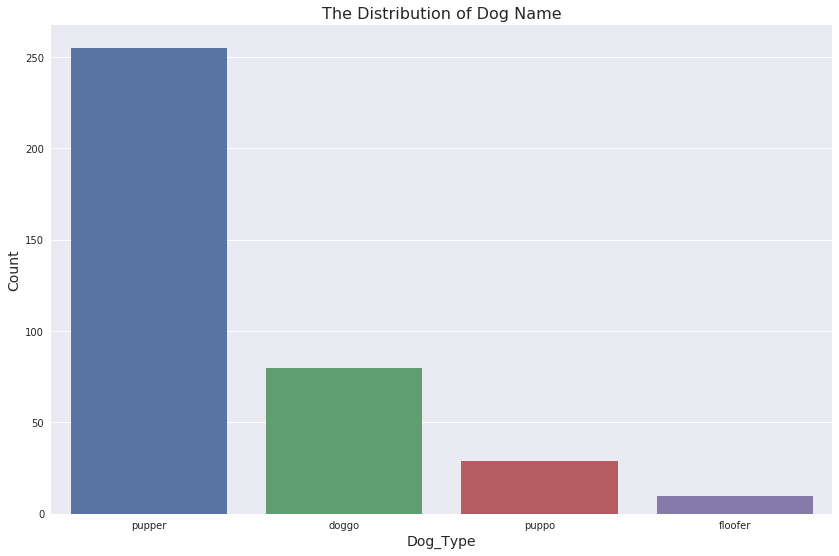

In [158]:
Top_type = final.mask(final.eq('None')).dropna().dog_type.value_counts().head(4).index
fig = plt.figure(figsize=(14,9))
sns.set(style="darkgrid")
sns.countplot(data = final, x = 'dog_type', order = Top_type,)
plt.xticks(rotation = 360)
plt.xlabel('Dog_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Name',fontsize=16)

> Mostly the type of dog is pupper: a small doggo, but usually younger

### 3. Correlation between variables

In [133]:
final.corr(method = 'pearson')

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000000,0.023986,-0.022078,0.519600,0.389042,0.206521,0.101821,0.002012,-0.043424
rating_numerator,0.023986,1.000000,0.188685,0.016965,0.017749,0.000363,-0.009744,-0.020481,-0.006127
rating_denominator,-0.022078,0.188685,1.000000,-0.021235,-0.020809,-0.000878,-0.006174,-0.037538,-0.007066
favorite_count,0.519600,0.016965,-0.021235,1.000000,0.800720,0.125228,0.066669,-0.017833,-0.046613
retweet_count,0.389042,0.017749,-0.020809,0.800720,1.000000,0.105860,0.043437,-0.004793,-0.031613
img_num,0.206521,0.000363,-0.000878,0.125228,0.105860,1.000000,0.203571,-0.159956,-0.139622
p1_conf,0.101821,-0.009744,-0.006174,0.066669,0.043437,0.203571,1.000000,-0.511298,-0.709449
p2_conf,0.002012,-0.020481,-0.037538,-0.017833,-0.004793,-0.159956,-0.511298,1.000000,0.479027
p3_conf,-0.043424,-0.006127,-0.007066,-0.046613,-0.031613,-0.139622,-0.709449,0.479027,1.000000


> There are strong correlation between favorite count and retweet count (r^2 = 0.8). This also match to the natural definition that most popular tweets always get high number of retweets and favourites count. 

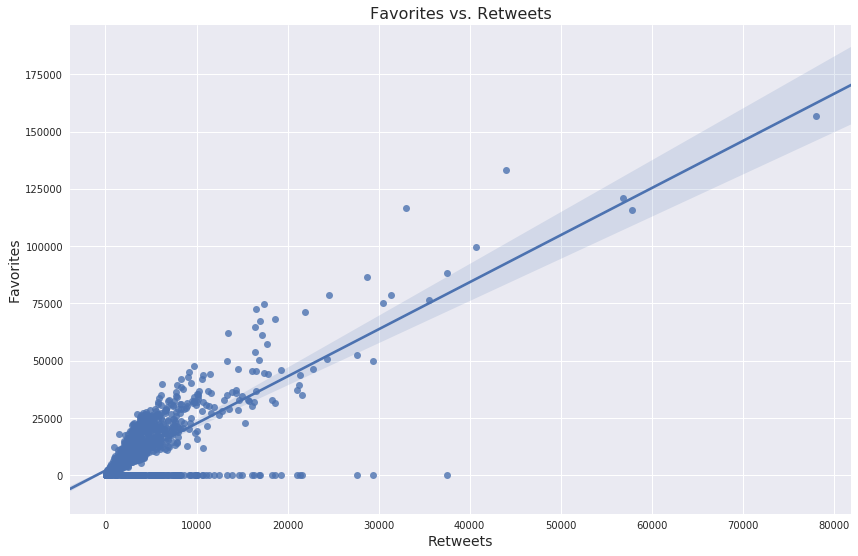

In [6]:
fig = plt.figure(figsize=(14,9))
RvsF = sns.regplot(x=final.retweet_count, y=final.favorite_count)
plt.title("Favorites vs. Retweets",fontsize = 16)
plt.xlabel('Retweets',fontsize=14)
plt.ylabel('Favorites',fontsize=14)
plt.show()

### 4. Distribution of dog breed

In [5]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('None')
        confidence.append(0)
        
final.apply(breed_confidence, axis=1)

final['dog_breed'] = breed
final['dog_confidence'] = confidence

final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,dog_breed,dog_confidence
0,667550904950915073,2015-11-20 03:51:52,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,0.0,33.0,...,False,Vizsla,0.000081,True,Collie,0.000069,True,None,Vizsla,0.000081
1,667550882905632768,2015-11-20 03:51:47,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,0.0,32.0,...,False,Dishwasher,0.000201,False,Oscilloscope,0.000142,False,None,None,0.000000
2,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,5546.0,2158.0,...,False,Spotlight,0.007737,False,Lampshade,0.001901,False,None,None,0.000000
3,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,328.0,116.0,...,True,Miniature_poodle,0.202225,True,Teddy,0.004047,False,None,Toy_poodle,0.787424
4,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,828.0,499.0,...,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,None,Pomeranian,0.412893


In [146]:
Top_breed = final.dog_breed.value_counts().nlargest(10)
Top_breed

None                  546
Golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
Pug                    65
Toy_poodle             52
Chow                   51
Samoyed                46
Pomeranian             42
Name: dog_breed, dtype: int64

In [147]:
final.loc[final['dog_breed'] == 'None', 'dog_breed'] = None

In [148]:
Top_breed1 = final.dog_breed.value_counts().nlargest(10)
Top_breed1

Golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
Pug                    65
Toy_poodle             52
Chow                   51
Samoyed                46
Pomeranian             42
Cocker_spaniel         34
Name: dog_breed, dtype: int64

Text(0.5,0,'Number of Tweets')

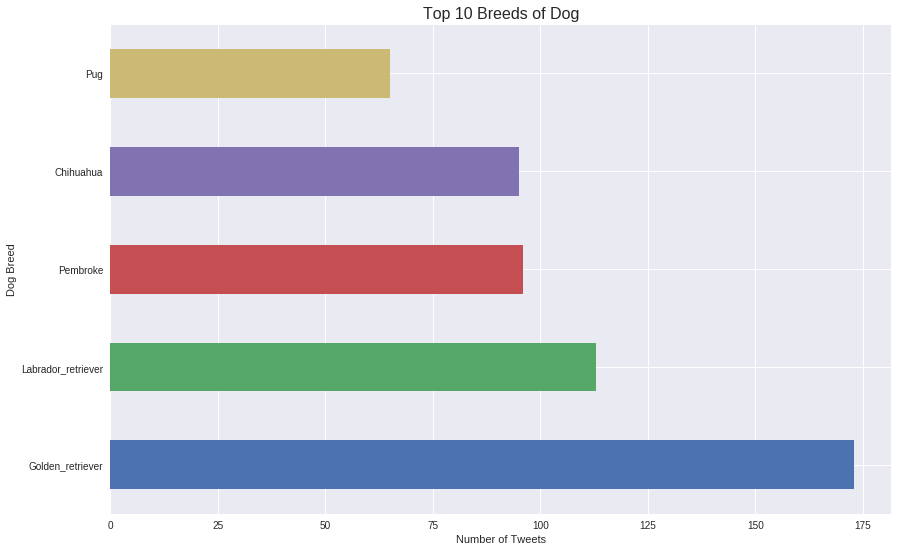

In [151]:
fig = plt.figure(figsize=(14,9))
final.groupby('dog_breed').count()['rating_numerator'].sort_values(ascending=True).nlargest(5).plot(kind='barh')
plt.title("Top 10 Breeds of Dog",fontsize=16)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets")

> The top breed of dog is Golden Retriever, followed by Labrador and Pembroke

### 5. Distribution of sources

Text(0.5,1,'The Distribution of Source')

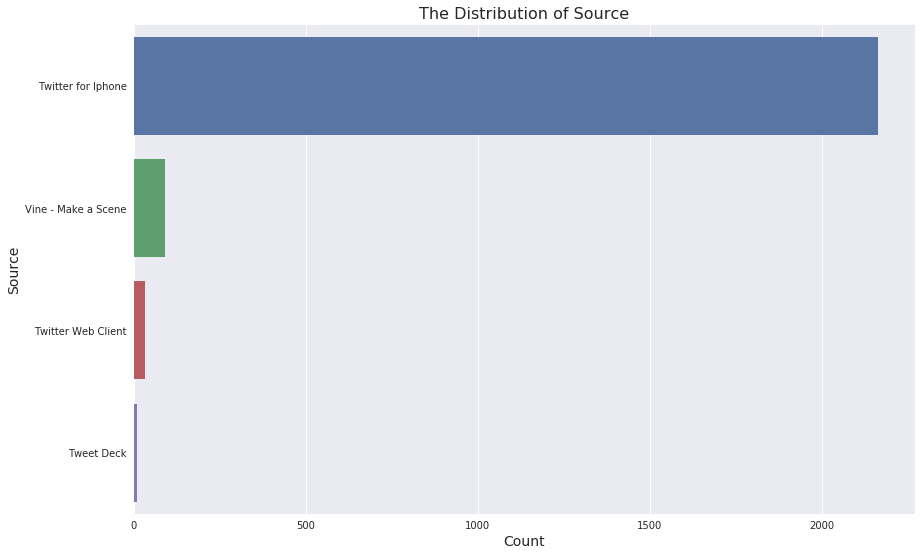

In [5]:
source = final['source'].value_counts().index
fig = plt.figure(figsize = (14,9))
sns.set(style="darkgrid")
sns.countplot(data = final, y = 'source', order = source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)